# Recommeder System for MovieLens Dataset

Data Source: https://grouplens.org/datasets/movielens/10m

The goal of recommender systems is to provide personalized product recommendations to users. These systems can suggest items to purchase, shows or movies to watch, articles to read, and much more. Well known organizations that rely on predictive user modeling for personalization approaches are Netflix and Amazon. Netflix systems recommend shows and movies for users to watch, while Amazon recommends similar items for a user to purchase.
     
   This project uses the popular MovieLens database which includes information about movies and ratings of users. The dataset contains 10000054   ratings and 95580 tags applied to 10681 movies by 71567 users.

Machine learning algorithms in recommender systems are typically classified into two categories — content based and collaborative filtering methods although modern recommenders combine both approaches. Content based methods are based on similarity of item attributes and collaborative methods calculate similarity from interactions. 

I will focus on Collaborative filtering method using Alternating Least Square Formulation for Recommender Systems.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Read tags.dat, ratings.dat and movies.dat files
tag_headers = ['user_id', 'movie_id', 'tag', 'timestamp']
tags = pd.read_table('movielens_1_data/tags.dat', sep='::', header=None, names=tag_headers)

rating_headers = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('movielens_1_data/ratings.dat', sep='::', header=None, names=rating_headers)

movie_headers = ['movie_id', 'title', 'genres']
movies = pd.read_table('movielens_1_data/movies.dat',sep='::', header=None, names=movie_headers)
movie_titles = movies.title.tolist()

In [2]:
#Movie List
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#Ratings of movies
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [25]:
ratings[['user_id','rating']].describe()

,user_id,rating
count,1.000005e+07,1.000005e+07
mean,3.586986e+04,3.512422e+00
std,2.058534e+04,1.060418e+00
min,1.000000e+00,5.000000e-01
25%,1.812300e+04,3.000000e+00
50%,3.574050e+04,4.000000e+00
75%,5.360800e+04,4.000000e+00
max,7.156700e+04,5.000000e+00


In [4]:
#Tags of movies
tags.head()

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


In [5]:
#Joining Movies, rating and tags table to generate single table.
df = movies.join(ratings, on=['movie_id'], rsuffix='_r').join(tags, on=['movie_id'], rsuffix='_t')

In [6]:
df.head()

,movie_id,title,genres,user_id,movie_id_r,rating,timestamp,user_id_t,movie_id_t,tag,timestamp_t
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,185,5.0,838983525,20,1747,politics,1188263867
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,231,5.0,838983392,20,1747,satire,1188263867
2,3,Grumpier Old Men (1995),Comedy|Romance,1,292,5.0,838983421,20,2424,chick flick 212,1188263835
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1,316,5.0,838983392,20,2424,hanks,1188263835
4,5,Father of the Bride Part II (1995),Comedy,1,329,5.0,838983392,20,2424,ryan,1188263835


In [7]:
#Removing redundant columns
del df['movie_id_r']
del df['user_id_t']
del df['movie_id_t']
del df['timestamp_t']

In [8]:
df.head()

,movie_id,title,genres,user_id,rating,timestamp,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,5.0,838983525,politics
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,5.0,838983392,satire
2,3,Grumpier Old Men (1995),Comedy|Romance,1,5.0,838983421,chick flick 212
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1,5.0,838983392,hanks
4,5,Father of the Bride Part II (1995),Comedy,1,5.0,838983392,ryan


In [9]:
rp = df.pivot_table(index=['user_id'],columns=['movie_id'],values='rating')
rp.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Replace NaN with 0
rp = rp.fillna(0); 
rp.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Alternating Least Square Method for Collaborative Method

We have users u for items i matrix as in the following:

\begin{align*}Q_{ui} =\begin{cases}r & if\ user\  u\   rate\  item\  i\\0 & if \ user \ u \ did \ not \ rate \ item \ i\end{cases}\end{align*}

where r is what rating values can be. If we have m users and n items, then we want to learn a matrix of factors which represent movies. That is, the factor vector for each movie and that would be how we represent the movie in the feature space.

The loss function used for collaborative filtering is the squared loss:

$$\ell(h_\theta(i,j),X_{i,j}) = (h_\theta(i,j) - X_{i,j})^2$$

Also impose an $l_2$ regularization on the parameters, total loss function is:

$$\sum_{i,j\in S}\ell(h_\theta(i,j),X_{i,j}) + \lambda_u ||U||_2^2 + \lambda_v ||V||_2^2$$

\begin{align*}Assumption: \lambda_u = \lambda_v = \lambda\end{align*}



### Matrix Factorization

Factor matrix for movies $$Y∈ℝ^{f x n}$$ and factor matrix for users $$X∈ℝ^{mxf}$$ We have two unknown variables. Therefore, we will adopt an alternating least squares approach with regularization. 

Formulas for ALS for solving two matrices are:

\begin{align*}x_u = (YC_uY^T + \lambda I)^{-1}YC_uQ_u\end{align*}

\begin{align*}y_u = (X^TC_iX + \lambda I)^{-1}X^TC_iQ_i\end{align*}

In [11]:
#Creating matrix Q of dimension m x n where m is number of users and n number of movies
Q = rp.values
Q.shape


(303, 10681)

We have neither user full data nor full items data, therefore we will penalize the movies that do not have ratings in the update rule. By doing so, we will depend on only the movies that have ratings from the users and do not make any assumption around the movies that are not rated in the recommendation.

\begin{align*}w_{ui} =\begin{cases}0 & if\ q_{ui} = 0\\1 & else\end{cases}\end{align*}


In [12]:
W = Q > 0.5
W[W == True] = 1
W[W == False] = 0
# To be consistent with our Q matrix
W = W.astype(np.float64, copy=False)

In [13]:
#parameters

lambda_ = 0.1   #Regularization Parameter
n_factors = 100
m, n = Q.shape
n_iterations = 20

In [14]:
X = 5 * np.random.rand(m, n_factors) 
Y = 5 * np.random.rand(n_factors, n)

In [15]:
#get_error funciton to calculate error
def get_error(Q, X, Y, W):
    """ mean squared error of the observed ratings in X and their estimated values. 
    
        Parameters: 
            Q  : a matrix of size m x n.
            X  : a matrix of size m x f where each movie is a user vector.
            Y  : a matrix of size f x n where each movie is a column vector.
            W  : a weighted matrix used to penalize with size same as Q. 
        Returns: 
            (float) : the mean squared error of the observed ratings with their estimated values
        """
    return np.sum((W * (Q - np.dot(X, Y)))**2)

In [23]:
#Print_recommedations function to print movie recommendation for all users
def print_recommendations(Q_hat,W=W, Q=Q, movie_titles=movie_titles):
    """ Print Recommendations for all users. 
    
        Parameters: 
            Q  : a matrix of size m x n.
            W  : a weighted matrix used to penalize with size same as Q.
            Q_hat : Converged Q
            movie_titles : Titles of all movies
        Returns: 
            Prints recommendation
        """
    Q_hat -= np.min(Q_hat)
    Q_hat *= float(5) / np.max(Q_hat)
    movie_ids = np.argmax(Q_hat - 5 * W, axis=1)
    for jj, movie_id in zip(range(m), movie_ids):

        print('\n User {} recommended movie is {} - with predicted rating: {}'.format(jj + 1, movie_titles[movie_id], Q_hat[jj, movie_id]))
        print('\n' + 100 *  '-' + '\n')


0th iteration is completed
1th iteration is completed
2th iteration is completed
3th iteration is completed
4th iteration is completed
5th iteration is completed
6th iteration is completed
7th iteration is completed
8th iteration is completed
9th iteration is completed
10th iteration is completed
11th iteration is completed
12th iteration is completed
13th iteration is completed
14th iteration is completed
15th iteration is completed
16th iteration is completed
17th iteration is completed
18th iteration is completed
19th iteration is completed
Error of rated movies: 58.842807122643684


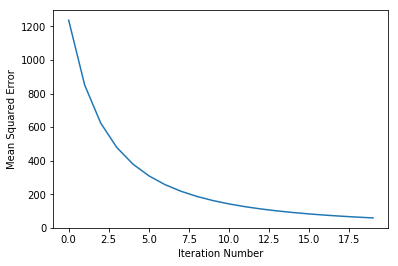

In [19]:
weighted_errors = []
for ii in range(n_iterations):
    for u, Wu in enumerate(W):
        X[u] = np.linalg.solve(np.dot(Y, np.dot(np.diag(Wu), Y.T)) + lambda_ * np.eye(n_factors),
                               np.dot(Y, np.dot(np.diag(Wu), Q[u].T))).T
    for i, Wi in enumerate(W.T):
        Y[:,i] = np.linalg.solve(np.dot(X.T, np.dot(np.diag(Wi), X)) + lambda_ * np.eye(n_factors),
                                 np.dot(X.T, np.dot(np.diag(Wi), Q[:, i])))
    weighted_errors.append(get_error(Q, X, Y, W))
    print('{}th iteration is completed'.format(ii))
weighted_Q_hat = np.dot(X,Y)
print('Error of rated movies: {}'.format(get_error(Q, X, Y, W)))
plt.plot(weighted_errors);
plt.xlabel('Iteration Number');
plt.ylabel('Mean Squared Error');
plt.show()

In [24]:
print_recommendations(Q_hat=weighted_Q_hat)



 User 1 recommended movie is Shoes of the Fisherman, The (1968) - with predicted rating: 4.475868436173154

----------------------------------------------------------------------------------------------------


 User 2 recommended movie is Inland Empire (2006) - with predicted rating: 2.9654249327375437

----------------------------------------------------------------------------------------------------


 User 3 recommended movie is Venus (2006) - with predicted rating: 3.2788459501697584

----------------------------------------------------------------------------------------------------


 User 4 recommended movie is Racing Stripes (2005) - with predicted rating: 2.920350711138163

----------------------------------------------------------------------------------------------------


 User 5 recommended movie is Life and Death of Peter Sellers, The (2004) - with predicted rating: 2.5848854002406108

------------------------------------------------------------------------------------

 User 102 recommended movie is Maltese Falcon, The (a.k.a. Dangerous Female) (1931) - with predicted rating: 2.5716703040250324

----------------------------------------------------------------------------------------------------


 User 103 recommended movie is Tropic Thunder (2008) - with predicted rating: 4.293694345899962

----------------------------------------------------------------------------------------------------


 User 104 recommended movie is Nim's Island (2008) - with predicted rating: 3.296097687966126

----------------------------------------------------------------------------------------------------


 User 105 recommended movie is Who Killed the Electric Car? (2006) - with predicted rating: 3.721862418659398

----------------------------------------------------------------------------------------------------


 User 106 recommended movie is Dracula's Daughter (1936) - with predicted rating: 3.7661638209926442

------------------------------------------------------

## Future Work:

1. Training the model on bigger dataset and running it for more number of iterations for better recommendation.
2. Using different hyperparameter for both matrices.
3. Incorporating pictures into recommendation.
4. Combining content based and collaborative based approach for recommendation.

## References

http://danielnee.com/2016/09/collaborative-filtering-using-alternating-least-squares/

http://cs229.stanford.edu/proj2014/Christopher%20Aberger,%20Recommender.pdf

https://medium.com/recombee-blog/machine-learning-for-recommender-systems-part-1-algorithms-evaluation-and-cold-start-6f696683d0ed